## UTS KECERDASAN BUATAN

* **Nama:** Revrico Ramadhino Irzan
* **NIM:** 231011403294
* **Kelas:** 05 TPLE 013

Input:
* **Permintaan (x)** = 3000
* **Persediaan (y)** = 700

In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Libraries (numpy dan matplotlib) berhasil diimpor.")

Libraries (numpy dan matplotlib) berhasil diimpor.


### Langkah 1: Definisi Fungsi Keanggotaan
Mendefinisikan semua fungsi keanggotaan (membership functions) untuk semua variabel.

In [2]:
# --- Fungsi Keanggotaan ---

# Permintaan [1000, 5000]
def permintaan_turun(x):
    if x <= 1000: return 1.0
    if x >= 5000: return 0.0
    return (5000 - x) / 4000

def permintaan_naik(x):
    if x <= 1000: return 0.0
    if x >= 5000: return 1.0
    return (x - 1000) / 4000

# Persediaan [100, 600]
def persediaan_sedikit(y):
    if y <= 100: return 1.0
    if y >= 600: return 0.0
    return (600 - y) / 500

def persediaan_banyak(y):
    if y <= 100: return 0.0
    if y >= 600: return 1.0
    return (y - 100) / 500

def persediaan_sedang(y):
    if y <= 100 or y >= 600: return 0.0
    if 100 < y <= 350: return (y - 100) / 250
    if 350 < y < 600: return (600 - y) / 250
    return 0.0

# Produksi [2000, 7000]
def produksi_berkurang(z):
    if z <= 2000: return 1.0
    if z >= 7000: return 0.0
    return (7000 - z) / 5000

def produksi_bertambah(z):
    if z <= 2000: return 0.0
    if z >= 7000: return 1.0
    return (z - 2000) / 5000

print("Semua Fungsi Keanggotaan Berhasil Didefinisikan.")

Semua Fungsi Keanggotaan Berhasil Didefinisikan.


### Langkah 2: Fuzzifikasi
Mengubah input *crisp* (3000 dan 700) menjadi nilai-nilai fuzzy (derajat keanggotaan).

In [3]:
# --- Input Crisp ---
permintaan = 3000
persediaan = 700

# --- Fuzzifikasi ---
f_permintaan = {
    'turun': permintaan_turun(permintaan),
    'naik': permintaan_naik(permintaan)
}
f_persediaan = {
    'sedikit': persediaan_sedikit(persediaan),
    'sedang': persediaan_sedang(persediaan),
    'banyak': persediaan_banyak(persediaan)
}

print(f"Input Permintaan: {permintaan}")
print(f"Input Persediaan: {persediaan}")
print("-" * 30)
print("Hasil Fuzzifikasi:")
print(f"  Permintaan: {f_permintaan}")
print(f"  Persediaan: {f_persediaan}")

Input Permintaan: 3000
Input Persediaan: 700
------------------------------
Hasil Fuzzifikasi:
  Permintaan: {'turun': 0.5, 'naik': 0.5}
  Persediaan: {'sedikit': 0.0, 'sedang': 0.0, 'banyak': 1.0}


### Langkah 3: Evaluasi Aturan (Inference)
Menghitung nilai alpha-predikat ($\alpha$) untuk setiap aturan menggunakan `MIN` (logika `AND`).

In [4]:
# [R1] IF Permintaan TURUN And Persediaan BANYAK THEN Produksi BERKURANG
a1 = min(f_permintaan['turun'], f_persediaan['banyak'])
# [R2] IF Permintaan TURUN And Persediaan SEDANG THEN Produksi BERKURANG
a2 = min(f_permintaan['turun'], f_persediaan['sedang'])
# [R3] IF Permintaan TURUN And Persediaan SEDIKIT THEN Produksi BERTAMBAH
a3 = min(f_permintaan['turun'], f_persediaan['sedikit'])
# [R4] IF Permintaan NAIK And Persediaan BANYAK THEN Produksi BERKURANG
a4 = min(f_permintaan['naik'], f_persediaan['banyak'])
# [R5] IF Permintaan NAIK And Persediaan SEDANG THEN Produksi BERTAMBAH
a5 = min(f_permintaan['naik'], f_persediaan['sedang'])
# [R6] IF Permintaan NAIK And Persediaan SEDIKIT THEN Produksi BERTAMBAH
a6 = min(f_permintaan['naik'], f_persediaan['sedikit'])

print("Hasil Evaluasi Aturan (Alpha):")
print(f"  [R1] (Berkurang): {a1}")
print(f"  [R2] (Berkurang): {a2}")
print(f"  [R3] (Bertambah): {a3}")
print(f"  [R4] (Berkurang): {a4}")
print(f"  [R5] (Bertambah): {a5}")
print(f"  [R6] (Bertambah): {a6}")

Hasil Evaluasi Aturan (Alpha):
  [R1] (Berkurang): 0.5
  [R2] (Berkurang): 0.0
  [R3] (Bertambah): 0.0
  [R4] (Berkurang): 0.5
  [R5] (Bertambah): 0.0
  [R6] (Bertambah): 0.0


### Langkah 4: Agregasi
Menggabungkan semua hasil aturan untuk setiap himpunan keluaran (`BERKURANG` dan `BERTAMBAH`) menggunakan `MAX`.

In [5]:
z_berkurang = max(a1, a2, a4) # Gabungan R1, R2, R4
z_bertambah = max(a3, a5, a6) # Gabungan R3, R5, R6

print("Hasil Agregasi:")
print(f"  μ Produksi BERKURANG = max({a1}, {a2}, {a4}) = {z_berkurang}")
print(f"  μ Produksi BERTAMBAH = max({a3}, {a5}, {a6}) = {z_bertambah}")

Hasil Agregasi:
  μ Produksi BERKURANG = max(0.5, 0.0, 0.5) = 0.5
  μ Produksi BERTAMBAH = max(0.0, 0.0, 0.0) = 0.0


### Langkah 5: Defuzzifikasi (Metode Centroid)
Menghitung nilai *crisp* (tegas) untuk produksi dengan mencari titik tengah (centroid) dari area gabungan.

In [6]:
z_star = 0.0
z_berkurang = round(z_berkurang, 5) 
z_bertambah = round(z_bertambah, 5)

# Perhitungan Centroid (Area)
if z_berkurang > 0 and z_bertambah == 0:
    print("Hanya area 'Produksi BERKURANG' yang aktif.")
    # (7000 - z) / 5000 = 0.5  => z = 4500
    z_clip = 7000 - (z_berkurang * 5000) 
    
    A1 = (z_clip - 2000) * z_berkurang
    C1 = (2000 + z_clip) / 2
    
    A2 = 0.5 * (7000 - z_clip) * z_berkurang
    C2 = z_clip + (7000 - z_clip) / 3
    
    z_star = ((A1 * C1) + (A2 * C2)) / (A1 + A2)
    print(f"  Perhitungan Area: A1={A1:.2f}, C1={C1:.2f} | A2={A2:.2f}, C2={C2:.2f}")

elif z_berkurang == 0 and z_bertambah > 0:
    print("Hanya area 'Produksi BERTAMBAH' yang aktif.")
    # (Logika jika BERTAMBAH > 0, tidak terjadi di kasus ini)
    z_clip = (z_bertambah * 5000) + 2000
    A1 = 0.5 * (z_clip - 2000) * z_bertambah
    C1 = 2000 + (z_clip - 2000) * 2 / 3
    A2 = (7000 - z_clip) * z_bertambah
    C2 = (z_clip + 7000) / 2
    z_star = ((A1 * C1) + (A2 * C2)) / (A1 + A2)
    
elif z_berkurang == 0 and z_bertambah == 0:
    print("Tidak ada aturan yang aktif, produksi = 0.")
    z_star = 0.0
else:
    # (Logika jika kedua area aktif, tidak terjadi di kasus ini)
    print("Kedua area aktif.")
    z_star = (2000+7000)/2 # Fallback

print("-" * 30)
print(f"Hasil Defuzzifikasi (z*) = {z_star:.2f}")
print(f"==> PRODUKSI YANG DISARANKAN: {round(z_star)} kemasan <==")

Hanya area 'Produksi BERKURANG' yang aktif.
  Perhitungan Area: A1=1250.00, C1=3250.00 | A2=625.00, C2=5333.33
------------------------------
Hasil Defuzzifikasi (z*) = 3944.44
==> PRODUKSI YANG DISARANKAN: 3944 kemasan <==


### Visualisasi Grafik (Plotting)
Menggunakan `numpy` dan `matplotlib` untuk menggambar semua fungsi keanggotaan dan hasil akhirnya.

In [7]:
# Vektorisasi fungsi (agar bisa di-plot)
# Ini adalah salah satu fungsi utama NumPy yang kita gunakan
permintaan_turun_v = np.vectorize(permintaan_turun)
permintaan_naik_v = np.vectorize(permintaan_naik)
persediaan_sedikit_v = np.vectorize(persediaan_sedikit)
persediaan_sedang_v = np.vectorize(persediaan_sedang)
persediaan_banyak_v = np.vectorize(persediaan_banyak)
produksi_berkurang_v = np.vectorize(produksi_berkurang)
produksi_bertambah_v = np.vectorize(produksi_bertambah)

print("Fungsi-fungsi siap untuk di-plot.")

Fungsi-fungsi siap untuk di-plot.


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16820\1817937208.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Derajat Keanggotaan ($\mu$)')


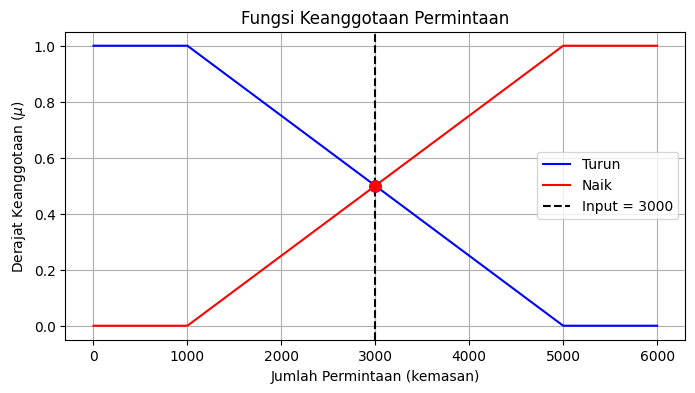

In [8]:
# --- Plot 1: Fungsi Keanggotaan Permintaan ---
x_permintaan = np.linspace(0, 6000, 500)
y_turun = permintaan_turun_v(x_permintaan)
y_naik = permintaan_naik_v(x_permintaan)

plt.figure(figsize=(8, 4))
plt.plot(x_permintaan, y_turun, 'b', label='Turun')
plt.plot(x_permintaan, y_naik, 'r', label='Naik')
plt.axvline(x=permintaan, color='k', linestyle='--', label=f'Input = {permintaan}')
plt.plot(permintaan, f_permintaan['turun'], 'bo', markersize=8)
plt.plot(permintaan, f_permintaan['naik'], 'ro', markersize=8)
plt.title('Fungsi Keanggotaan Permintaan')
plt.xlabel('Jumlah Permintaan (kemasan)')
plt.ylabel('Derajat Keanggotaan ($\mu$)')
plt.legend()
plt.grid(True)
plt.savefig('plot_permintaan.png')
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16820\2532243487.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Derajat Keanggotaan ($\mu$)')


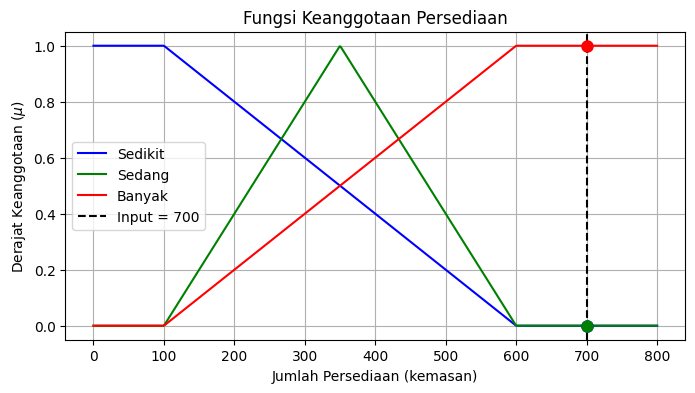

In [9]:
# --- Plot 2: Fungsi Keanggotaan Persediaan ---
x_persediaan = np.linspace(0, 800, 500)
y_sedikit = persediaan_sedikit_v(x_persediaan)
y_sedang = persediaan_sedang_v(x_persediaan)
y_banyak = persediaan_banyak_v(x_persediaan)

plt.figure(figsize=(8, 4))
plt.plot(x_persediaan, y_sedikit, 'b', label='Sedikit')
plt.plot(x_persediaan, y_sedang, 'g', label='Sedang')
plt.plot(x_persediaan, y_banyak, 'r', label='Banyak')
plt.axvline(x=persediaan, color='k', linestyle='--', label=f'Input = {persediaan}')
plt.plot(persediaan, f_persediaan['sedikit'], 'bo', markersize=8)
plt.plot(persediaan, f_persediaan['sedang'], 'go', markersize=8)
plt.plot(persediaan, f_persediaan['banyak'], 'ro', markersize=8)
plt.title('Fungsi Keanggotaan Persediaan')
plt.xlabel('Jumlah Persediaan (kemasan)')
plt.ylabel('Derajat Keanggotaan ($\mu$)')
plt.legend()
plt.grid(True)
plt.savefig('plot_persediaan.png')
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16820\3113126515.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Derajat Keanggotaan ($\mu$)')


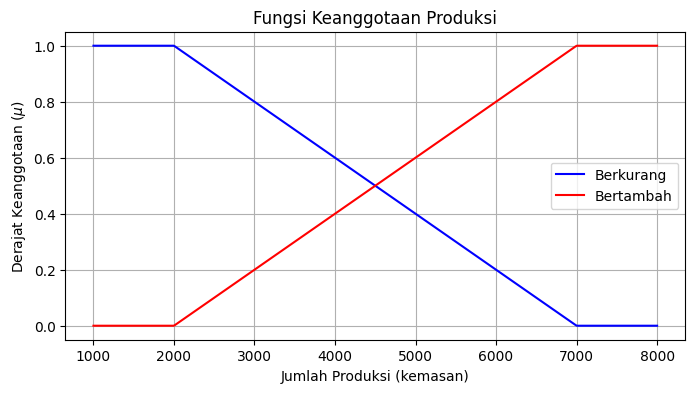

In [10]:
# --- Plot 3: Fungsi Keanggotaan Produksi (Dasar) ---
x_produksi = np.linspace(1000, 8000, 500)
y_berkurang = produksi_berkurang_v(x_produksi)
y_bertambah = produksi_bertambah_v(x_produksi)

plt.figure(figsize=(8, 4))
plt.plot(x_produksi, y_berkurang, 'b', label='Berkurang')
plt.plot(x_produksi, y_bertambah, 'r', label='Bertambah')
plt.title('Fungsi Keanggotaan Produksi')
plt.xlabel('Jumlah Produksi (kemasan)')
plt.ylabel('Derajat Keanggotaan ($\mu$)')
plt.legend()
plt.grid(True)
plt.savefig('plot_produksi.png')
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16820\1769379729.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.fill_between(x_produksi, y_agregat, color='gray', alpha=0.5, label=f'Area Agregat ($\mu={z_berkurang}$)')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16820\1769379729.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Derajat Keanggotaan ($\mu$)')


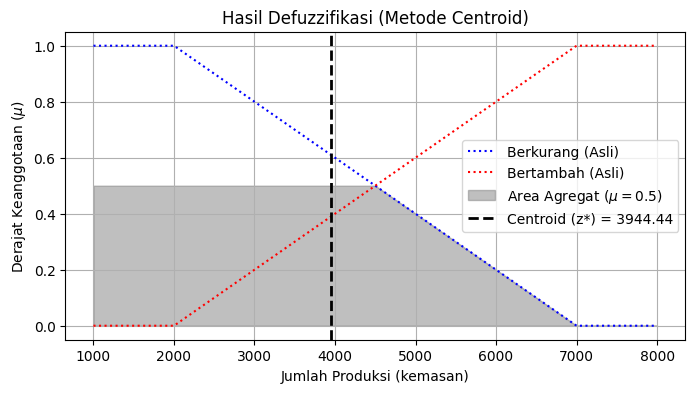

In [11]:
# --- Plot 4: Hasil Defuzzifikasi (Area Agregat) ---
x_produksi = np.linspace(1000, 8000, 500)

# Gunakan NumPy untuk 'memotong' grafik
y_berkurang_clipped = np.minimum(z_berkurang, produksi_berkurang_v(x_produksi))
y_bertambah_clipped = np.minimum(z_bertambah, produksi_bertambah_v(x_produksi))

# Gunakan NumPy untuk menggabungkan area
y_agregat = np.maximum(y_berkurang_clipped, y_bertambah_clipped)

plt.figure(figsize=(8, 4))
plt.plot(x_produksi, produksi_berkurang_v(x_produksi), 'b:', label='Berkurang (Asli)')
plt.plot(x_produksi, produksi_bertambah_v(x_produksi), 'r:', label='Bertambah (Asli)')

# Arsir area gabungan
plt.fill_between(x_produksi, y_agregat, color='gray', alpha=0.5, label=f'Area Agregat ($\mu={z_berkurang}$)')
# Garis centroid (hasil akhir)
plt.axvline(x=z_star, color='k', linestyle='--', linewidth=2, label=f'Centroid (z*) = {z_star:.2f}')

plt.title('Hasil Defuzzifikasi (Metode Centroid)')
plt.xlabel('Jumlah Produksi (kemasan)')
plt.ylabel('Derajat Keanggotaan ($\mu$)')
plt.legend()
plt.grid(True)
plt.savefig('plot_defuzzifikasi.png')
plt.show()